In [1]:
%load_ext watermark
%watermark -u -d -p numpy,pandas,matplotlib,sklearn

last updated: 2020-03-31 

numpy 1.18.1
pandas 1.0.3
matplotlib 3.2.1
sklearn 0.22.2.post1


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 로지스틱 회귀를 사용한 클래스 확률 모델링

In [10]:
def sigmoid(z):
    return 1.0 /(1.0 + np.exp(-z))

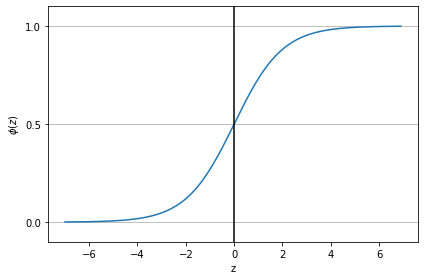

In [11]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

### 로지스틱 비용 함수의 가중치 학습하기

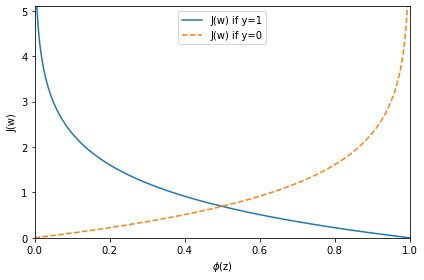

In [12]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 3.3.4 사이킷런을 사용하여 로지스틱 회귀 모델 훈련

In [32]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [33]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# 꽃잎 길이와 꽃잎 너비를 특성행렬 X에 저장
# 이에 상승하는 꽃 품종에 해당하는 클래스 레이블을 벡터 y에 할당
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

C:\ProgramData\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


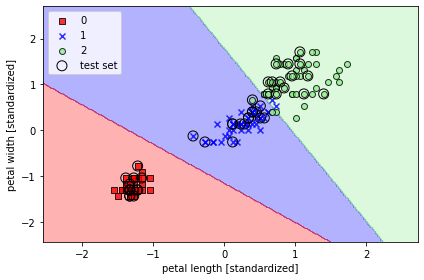

In [34]:
from sklearn.linear_model import LogisticRegression
# Learning Rate
lr = LogisticRegression(solver='lbfgs', multi_class='auto', C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [35]:
lr.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [37]:
y_test

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [40]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [41]:
# 위의 방법보다 아래의 방법이 더 효율적
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [45]:
# 샘플 하나의 클래스 레이블을 예측할 때 2차원으로 만들어 줘야 한다.
# 사이킷런은 입력 데이터로 2차원 행렬을 기대함.
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

### 3.3.5 규제를 사용하여 과대적합 피하기

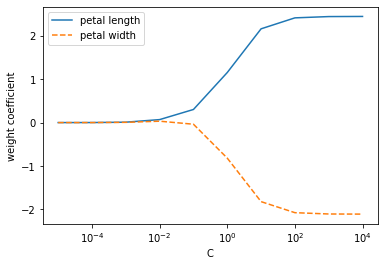

In [46]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

### 3.4.2 슬랙 변수를 사용하여 비선형 분류 문제 다루기

C:\ProgramData\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


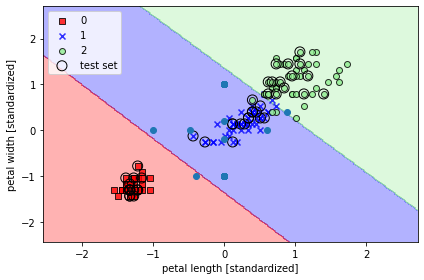

In [48]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.scatter(svm.dual_coef_[0, :], svm.dual_coef_[1, :])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 3.5 커널 SVM을 사용하여 비선형 문제 풀기

### 3.5.1 선형적으로 구분되지 않는 데이터를 위한 커널 방법

In [49]:
np.random.seed(1)

In [50]:
X_xor = np.random.randn(200, 2)
X_xor

array([[ 1.62434536e+00, -6.11756414e-01],
       [-5.28171752e-01, -1.07296862e+00],
       [ 8.65407629e-01, -2.30153870e+00],
       [ 1.74481176e+00, -7.61206901e-01],
       [ 3.19039096e-01, -2.49370375e-01],
       [ 1.46210794e+00, -2.06014071e+00],
       [-3.22417204e-01, -3.84054355e-01],
       [ 1.13376944e+00, -1.09989127e+00],
       [-1.72428208e-01, -8.77858418e-01],
       [ 4.22137467e-02,  5.82815214e-01],
       [-1.10061918e+00,  1.14472371e+00],
       [ 9.01590721e-01,  5.02494339e-01],
       [ 9.00855949e-01, -6.83727859e-01],
       [-1.22890226e-01, -9.35769434e-01],
       [-2.67888080e-01,  5.30355467e-01],
       [-6.91660752e-01, -3.96753527e-01],
       [-6.87172700e-01, -8.45205641e-01],
       [-6.71246131e-01, -1.26645989e-02],
       [-1.11731035e+00,  2.34415698e-01],
       [ 1.65980218e+00,  7.42044161e-01],
       [-1.91835552e-01, -8.87628964e-01],
       [-7.47158294e-01,  1.69245460e+00],
       [ 5.08077548e-02, -6.36995647e-01],
       [ 1.

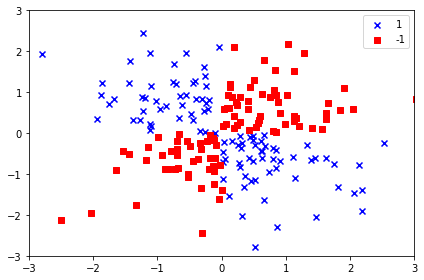

In [54]:
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

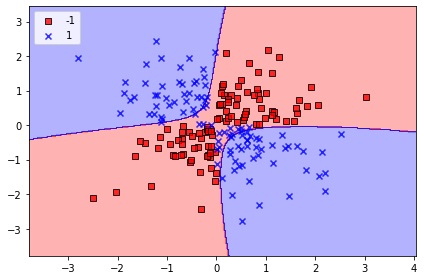

In [58]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


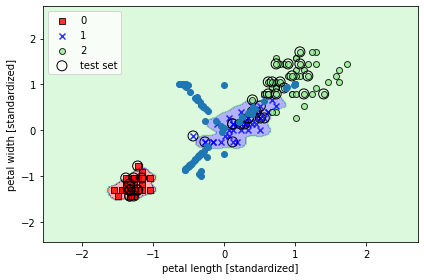

In [61]:
# 붓꽃 데이터에 적용
# svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.scatter(svm.dual_coef_[0,:], svm.dual_coef_[1,:])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()